### Support the notebook if you like it. Upvote is FREE :)

# Imports

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Read data

In [2]:
assets = pd.read_csv('../input/g-research-crypto-forecasting/asset_details.csv')
sup_train = pd.read_csv('../input/g-research-crypto-forecasting/supplemental_train.csv')
sample = pd.read_csv('../input/g-research-crypto-forecasting/example_sample_submission.csv')
ex_test = pd.read_csv('../input/g-research-crypto-forecasting/example_test.csv')

In [3]:
train = pd.read_csv('../input/g-research-crypto-forecasting/train.csv')

# EDA

In [4]:
train.head()

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
0,1514764860,2,40.0,2376.5800,2399.5000,2357.1400,2374.5900,19.233005,2373.116392,-0.004218
1,1514764860,0,5.0,8.5300,8.5300,8.5300,8.5300,78.380000,8.530000,-0.014399
2,1514764860,1,229.0,13835.1940,14013.8000,13666.1100,13850.1760,31.550062,13827.062093,-0.014643
3,1514764860,5,32.0,7.6596,7.6596,7.6567,7.6576,6626.713370,7.657713,-0.013922
4,1514764860,7,5.0,25.9200,25.9200,25.8740,25.8770,121.087310,25.891363,-0.008264


In [5]:
train.shape

(24236806, 10)

### We have 24 Million records with 10 columns

In [6]:
train['timestamp'].nunique()

1956782

### We have total of 1.9 Million timestamps

### Lets explore assets csv file

In [7]:
assets

,Asset_ID,Weight,Asset_Name
0,2,2.397895,Bitcoin Cash
1,0,4.304065,Binance Coin
2,1,6.779922,Bitcoin
3,5,1.386294,EOS.IO
4,7,2.079442,Ethereum Classic
5,6,5.894403,Ethereum
6,9,2.397895,Litecoin
7,11,1.609438,Monero
8,13,1.791759,TRON
9,12,2.079442,Stellar


### Lets check how weights are distributed

<AxesSubplot:xlabel='Asset_Name', ylabel='Weight'>

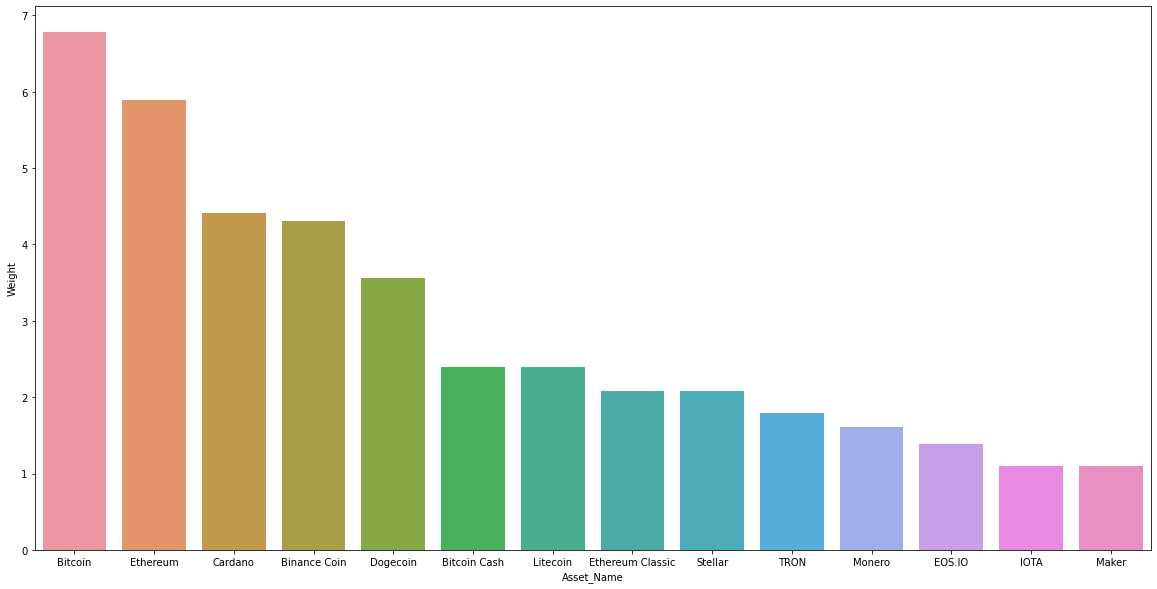

In [8]:
plt.subplots(figsize=(20,10))
sns.barplot(x='Asset_Name', y='Weight', data=assets.sort_values(by=['Weight'],ascending=False))

### Lets see the data distribution in each timestamp

In [9]:
train[train['timestamp'] == 1514764860]

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
0,1514764860,2,40.0,2376.5800,2399.5000,2357.1400,2374.590000,19.233005,2373.116392,-0.004218
1,1514764860,0,5.0,8.5300,8.5300,8.5300,8.530000,78.380000,8.530000,-0.014399
2,1514764860,1,229.0,13835.1940,14013.8000,13666.1100,13850.176000,31.550062,13827.062093,-0.014643
3,1514764860,5,32.0,7.6596,7.6596,7.6567,7.657600,6626.713370,7.657713,-0.013922
4,1514764860,7,5.0,25.9200,25.9200,25.8740,25.877000,121.087310,25.891363,-0.008264
5,1514764860,6,173.0,738.3025,746.0000,732.5100,738.507500,335.987856,738.839291,-0.004809
6,1514764860,9,167.0,225.3300,227.7800,222.9800,225.206667,411.896642,225.197944,-0.009791
7,1514764860,11,7.0,329.0900,329.8800,329.0900,329.460000,6.635710,329.454118,NaN


Please note that there are total of 14 asset data (crypto currencies) given.
For a particular timestamp, we need not necessarily have a record of each asset. 
From above table, we have only 7 asset details. Target value for one of them is NaN. 

# Cleaning

### Lets check missing values

In [10]:
train.isnull().sum()

timestamp         0
Asset_ID          0
Count             0
Open              0
High              0
Low               0
Close             0
Volume            0
VWAP              9
Target       750338
dtype: int64

### Join Asset tables for Analysis.

In [11]:
df_train = pd.merge(train, assets, how="left", on=["Asset_ID"])
df_train.head()

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,Weight,Asset_Name
0,1514764860,2,40.0,2376.5800,2399.5000,2357.1400,2374.5900,19.233005,2373.116392,-0.004218,2.397895,Bitcoin Cash
1,1514764860,0,5.0,8.5300,8.5300,8.5300,8.5300,78.380000,8.530000,-0.014399,4.304065,Binance Coin
2,1514764860,1,229.0,13835.1940,14013.8000,13666.1100,13850.1760,31.550062,13827.062093,-0.014643,6.779922,Bitcoin
3,1514764860,5,32.0,7.6596,7.6596,7.6567,7.6576,6626.713370,7.657713,-0.013922,1.386294,EOS.IO
4,1514764860,7,5.0,25.9200,25.9200,25.8740,25.8770,121.087310,25.891363,-0.008264,2.079442,Ethereum Classic


# Vizualize

### Lets see total distribution per bitcoin

In [12]:
df = df_train.dropna()

<AxesSubplot:xlabel='Asset_Name', ylabel='count'>

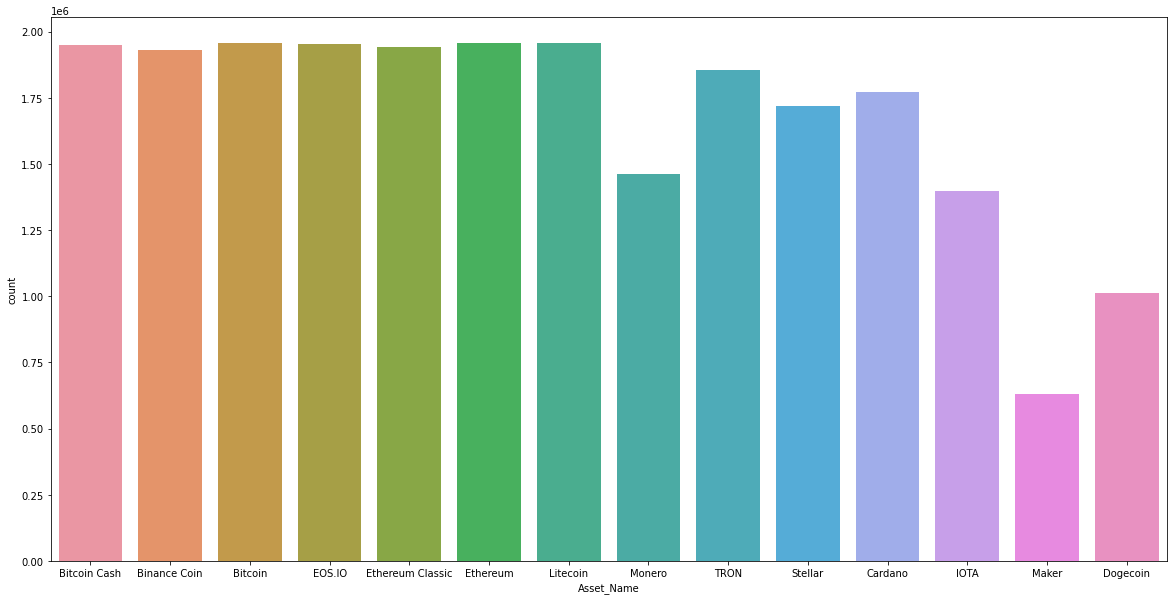

In [13]:
plt.subplots(figsize=(20,10))
sns.countplot(x='Asset_Name', data = df)

### Comparatively there are less records in Maker, Dogecoin, IOTA & Monero

In [14]:
df.sample(20)

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,Weight,Asset_Name
117564,1515659100,0,38.0,17.320000,17.320000,17.280000,17.299500,997.220000,17.308822,-0.019618,4.304065,Binance Coin
18887175,1609250280,9,234.0,128.091571,128.300000,127.950000,128.063000,720.581685,128.125528,0.004409,2.397895,Litecoin
16608953,1599356340,7,74.0,5.234867,5.723000,4.984800,5.238400,2620.045386,5.237346,0.040653,2.079442,Ethereum Classic
17233287,1602080700,1,527.0,10612.715000,10619.310000,10601.500000,10611.086667,61.467471,10611.799670,0.000579,6.779922,Bitcoin
4740051,1542314820,6,274.0,178.506667,181.520000,175.410000,178.565000,820.320598,178.465576,-0.000943,5.894403,Ethereum
8553886,1561026360,9,116.0,134.513200,135.050000,134.216000,134.583200,898.885859,134.546211,-0.001176,2.397895,Litecoin
6374585,1550596800,7,53.0,4.591650,4.665600,4.550000,4.590400,2781.152581,4.591298,0.009268,2.079442,Ethereum Classic
20143872,1614636840,3,441.0,1.297201,1.300000,1.294710,1.296610,390095.973079,1.297074,-0.002104,4.406719,Cardano
5836825,1547893440,3,69.0,0.045783,0.045810,0.045720,0.045787,355456.130394,0.045783,-0.001742,4.406719,Cardano
10413769,1570004880,9,14.0,56.190000,56.220000,56.160000,56.190000,67.964010,56.193597,0.005131,2.397895,Litecoin


<AxesSubplot:>

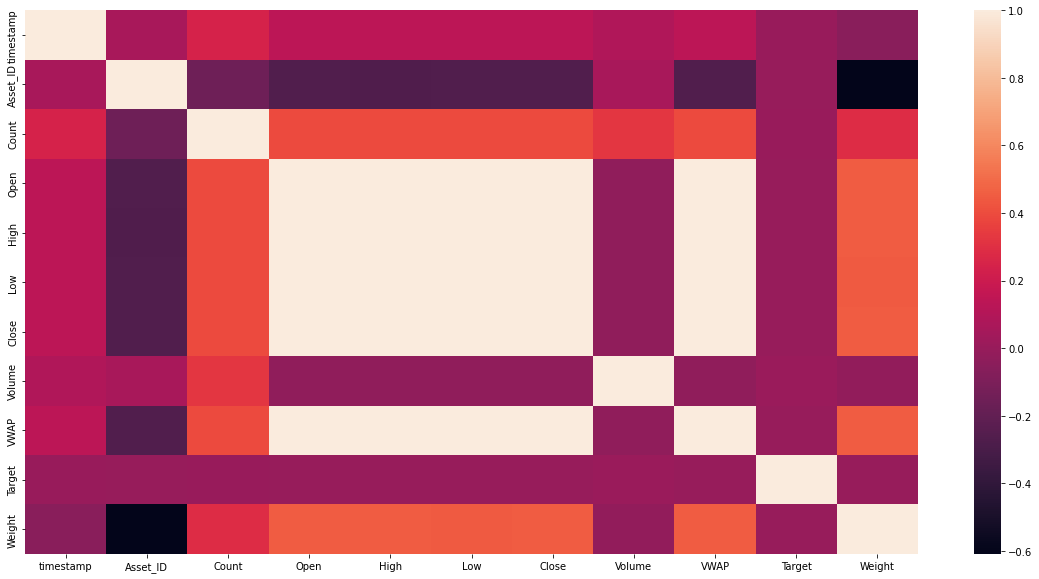

In [15]:
plt.subplots(figsize=(20,10))
sns.heatmap(df.corr())

### Correlation here is Obvious as Open, Close, High & Low, VWAP (avg volume) values should be very close within a timestamp. Please note that no signaificant correlation found for Target column

In [16]:
def reduce_mem_usage(df,do_categoricals=False):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            if do_categoricals==True:
                df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))   
    return df

dtrain = reduce_mem_usage(df)

Memory usage of dataframe is 2329.44 MB
Memory usage after optimization is: 1097.52 MB
Decreased by 52.9%


In [17]:
dtrain['fulldate'] = pd.to_datetime(dtrain['timestamp'], unit='s')
dtrain['date'] = dtrain['fulldate'].apply(lambda d: d.date())
dtrain['time'] = dtrain['fulldate'].apply(lambda d: d.time())
dtrain.head()

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,Weight,Asset_Name,fulldate,date,time
0,1514764860,2,40.0,2376.000000,2400.000000,2358.00000,2374.00000,19.233006,2373.116392,-0.004219,2.398438,Bitcoin Cash,2018-01-01 00:01:00,2018-01-01,00:01:00
1,1514764860,0,5.0,8.531250,8.531250,8.53125,8.53125,78.379997,8.530000,-0.014397,4.304688,Binance Coin,2018-01-01 00:01:00,2018-01-01,00:01:00
2,1514764860,1,229.0,13832.000000,14016.000000,13664.00000,13848.00000,31.550062,13827.062093,-0.014641,6.781250,Bitcoin,2018-01-01 00:01:00,2018-01-01,00:01:00
3,1514764860,5,32.0,7.660156,7.660156,7.65625,7.65625,6626.713379,7.657713,-0.013924,1.386719,EOS.IO,2018-01-01 00:01:00,2018-01-01,00:01:00
4,1514764860,7,5.0,25.921875,25.921875,25.87500,25.87500,121.087311,25.891363,-0.008263,2.080078,Ethereum Classic,2018-01-01 00:01:00,2018-01-01,00:01:00


In [18]:
dtrain_sample = dtrain.sample(10000)

In [19]:
dtrain_sample.head()

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,Weight,Asset_Name,fulldate,date,time
13553573,1585138620,11,20.0,46.0000,46.15625,45.96875,46.125,205.776703,46.050390,-0.008354,1.609375,Monero,2020-03-25 12:17:00,2020-03-25,12:17:00
20696244,1617004200,6,705.0,1706.0000,1707.00000,1705.00000,1706.000,332.589050,1706.137963,-0.000153,5.894531,Ethereum,2021-03-29 07:50:00,2021-03-29,07:50:00
3582103,1536281220,1,221.0,6484.0000,6496.00000,6472.00000,6480.000,50.315563,6481.883075,-0.000308,6.781250,Bitcoin,2018-09-07 00:47:00,2018-09-07,00:47:00
17882547,1604918880,1,862.0,15480.0000,15496.00000,15456.00000,15472.000,61.421535,15475.433907,-0.000648,6.781250,Bitcoin,2020-11-09 10:48:00,2020-11-09,10:48:00
4607158,1541646600,11,11.0,111.6875,111.75000,111.56250,111.625,4.170800,111.654861,-0.001611,1.609375,Monero,2018-11-08 03:10:00,2018-11-08,03:10:00


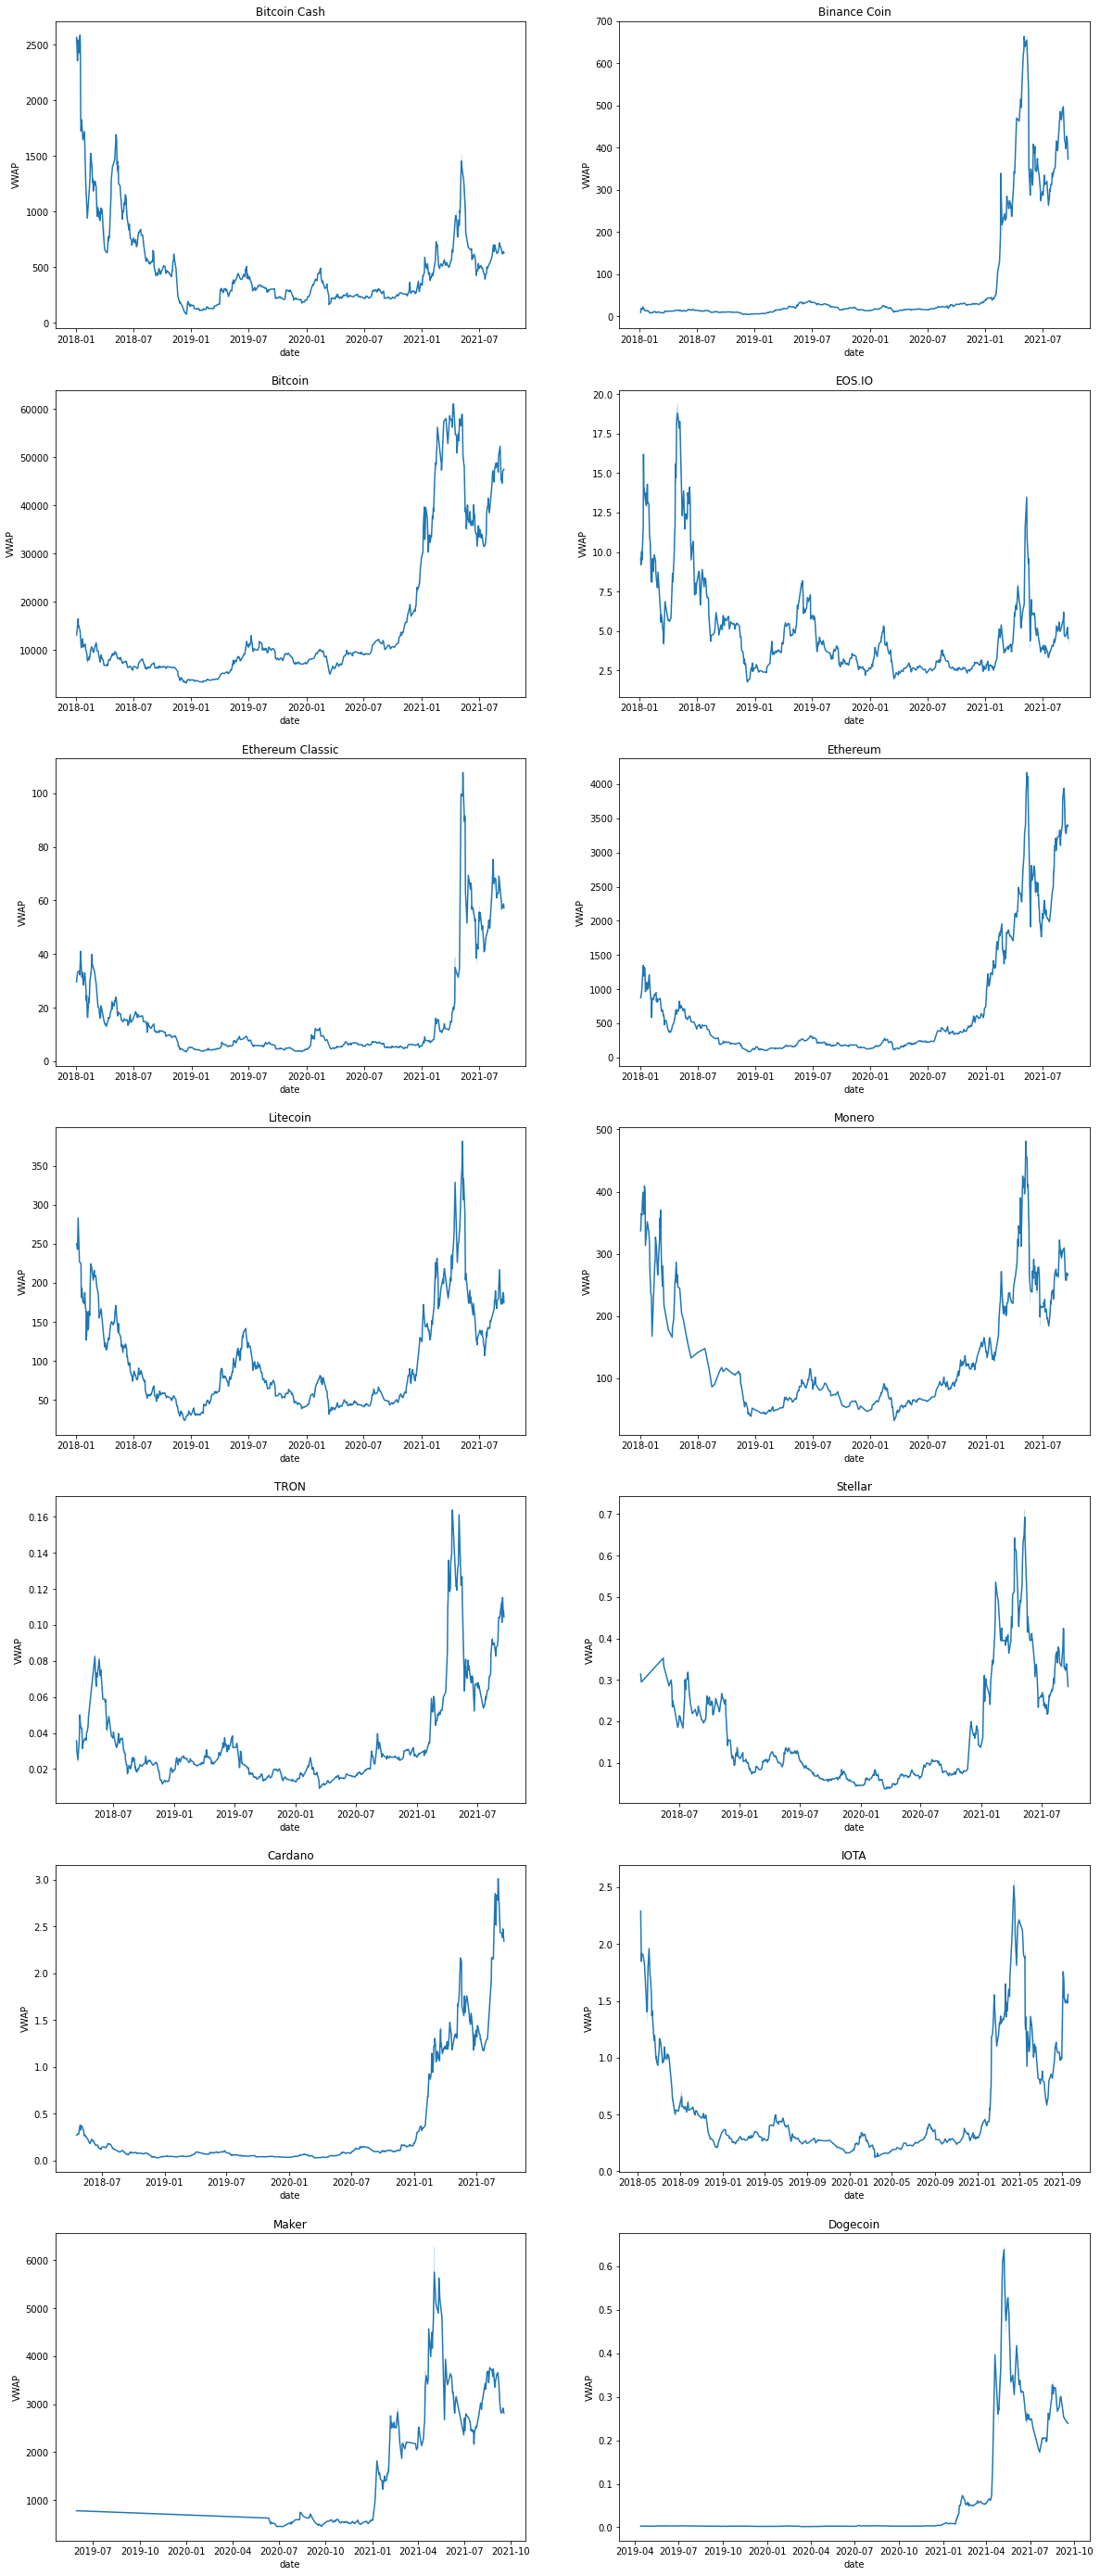

In [20]:
fig, axes = plt.subplots(7, 2, figsize=(20, 50))
for i,asset in enumerate(assets['Asset_Name']):
    df_crypt = dtrain_sample[dtrain_sample['Asset_Name'] == asset]
    sns.lineplot(x="date", y="VWAP", data=df_crypt, ax=axes[int(i/2),i%2])
    axes[int(i/2),i%2].set_title(asset)

In [21]:
print("Available data period")
for i,asset in enumerate(assets['Asset_Name']):
    df_crypt = dtrain[dtrain['Asset_Name'] == asset]
    print( "{} to {} ------> {}".format(df_crypt.sort_values(by=['timestamp'])['date'].iloc[0], df_crypt.sort_values(by=['timestamp'])['date'].iloc[-1], asset ))

Available data period
2018-01-01 to 2021-09-20 ------> Bitcoin Cash
2018-01-01 to 2021-09-20 ------> Binance Coin
2018-01-01 to 2021-09-20 ------> Bitcoin
2018-01-01 to 2021-09-20 ------> EOS.IO
2018-01-01 to 2021-09-20 ------> Ethereum Classic
2018-01-01 to 2021-09-20 ------> Ethereum
2018-01-01 to 2021-09-20 ------> Litecoin
2018-01-01 to 2021-09-20 ------> Monero
2018-02-06 to 2021-09-20 ------> TRON
2018-02-17 to 2021-09-20 ------> Stellar
2018-04-17 to 2021-09-20 ------> Cardano
2018-05-09 to 2021-09-20 ------> IOTA
2018-08-15 to 2021-09-20 ------> Maker
2019-04-12 to 2021-09-20 ------> Dogecoin


# References

1. [Let's Talk Validation: GroupTimeSeriesSplit](https://www.kaggle.com/yamqwe/let-s-talk-validation-grouptimeseriessplit/notebook#References)